<a href="https://colab.research.google.com/github/AsmaHatmi/Assignments/blob/main/LaptopPricePredictionn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re as re
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load data
df = pd.read_csv("/content/sample_data/data.csv")
print(df.head())

   Unnamed: 0   brand                                  name  price  \
0           0      HP      Victus 15-fb0157AX Gaming Laptop  49900   
1           1      HP                   15s-fq5007TU Laptop  39900   
2           2    Acer                  One 14 Z8-415 Laptop  26990   
3           3  Lenovo  Yoga Slim 6 14IAP8 82WU0095IN Laptop  59729   
4           4   Apple       MacBook Air 2020 MGND3HN Laptop  69990   

   spec_rating                      processor                             CPU  \
0    73.000000      5th Gen AMD Ryzen 5 5600H           Hexa Core, 12 Threads   
1    60.000000   12th Gen Intel Core i3 1215U  Hexa Core (2P + 4E), 8 Threads   
2    69.323529  11th Gen Intel Core i3 1115G4            Dual Core, 4 Threads   
3    66.000000   12th Gen Intel Core i5 1240P  12 Cores (4P + 8E), 16 Threads   
4    69.323529                       Apple M1             Octa Core (4P + 4E)   

    Ram Ram_type    ROM ROM_type                           GPU  display_size  \
0   8GB     

In [ ]:
#Using drop to clean data
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920,1080,Windows 11 OS,1
1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920,1080,Windows 11 OS,1
2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920,1080,Windows 11 OS,1
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240,1400,Windows 11 OS,1
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560,1600,Mac OS,1


In [ ]:
#check the duplicated rows if any
print(df.duplicated().sum())
print(df.shape)

0
(893, 17)


In [ ]:
#checking the null values
df.isnull().sum()

brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

In [ ]:
#descriptions
df.brand.value_counts()
df.shape
df.describe(include='object')

,brand,name,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,OS
count,893,893,893,893,893,893,893,893,893,893
unique,30,815,184,29,7,12,7,2,134,14
top,HP,Inspiron 3525 Laptop,12th Gen Intel Core i5 1235U,"Quad Core, 8 Threads",16GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,Windows 11 OS
freq,186,4,49,130,456,499,634,872,107,782


In [ ]:
# Identify numeric and categorical features
numeric_features = ['price', 'spec_rating', 'Ram', 'ROM', 'display_size', 'resolution_width', 'resolution_height', 'warranty']
categorical_features = ['brand', 'name', 'processor','CPU', 'Ram_type','ROM_type', 'GPU', 'OS']

In [ ]:
#Extract numbers and units
#Ram
def add_space_between_number_and_unit_Ram(input_string):
  return re.sub(r'(\d+)([a-zA-Z]+)', r'\1 \2', input_string)

df['Ram'] = df['Ram'].apply(add_space_between_number_and_unit_Ram)
print(df)

      brand                                               name   price  \
0        HP                   Victus 15-fb0157AX Gaming Laptop   49900   
1        HP                                15s-fq5007TU Laptop   39900   
2      Acer                               One 14 Z8-415 Laptop   26990   
3    Lenovo               Yoga Slim 6 14IAP8 82WU0095IN Laptop   59729   
4     Apple                    MacBook Air 2020 MGND3HN Laptop   69990   
..      ...                                                ...     ...   
888    Asus          Vivobook 15X 2023 K3504VAB-NJ321WS Laptop   44990   
889    Asus                     TUF A15 FA577RM-HQ032WS Laptop  110000   
890    Asus  ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...  189990   
891    Asus  TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop  129990   
892    Asus  TUF Gaming A15 2023 FA577XU-LP041WS Gaming Laptop  131990   

     spec_rating                      processor  \
0      73.000000      5th Gen AMD Ryzen 5 5600H   
1      60

In [ ]:
#ROM
def add_space_between_number_and_unit_ROM(input_string):
    return re.sub(r'(\d+)([a-zA-Z]+)', r'\1 \2', input_string)

df['ROM'] = df['ROM'].apply(add_space_between_number_and_unit_ROM)
print(df)

      brand                                               name   price  \
0        HP                   Victus 15-fb0157AX Gaming Laptop   49900   
1        HP                                15s-fq5007TU Laptop   39900   
2      Acer                               One 14 Z8-415 Laptop   26990   
3    Lenovo               Yoga Slim 6 14IAP8 82WU0095IN Laptop   59729   
4     Apple                    MacBook Air 2020 MGND3HN Laptop   69990   
..      ...                                                ...     ...   
888    Asus          Vivobook 15X 2023 K3504VAB-NJ321WS Laptop   44990   
889    Asus                     TUF A15 FA577RM-HQ032WS Laptop  110000   
890    Asus  ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...  189990   
891    Asus  TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop  129990   
892    Asus  TUF Gaming A15 2023 FA577XU-LP041WS Gaming Laptop  131990   

     spec_rating                      processor  \
0      73.000000      5th Gen AMD Ryzen 5 5600H   
1      60

In [ ]:
# converting from TB>GB unit for Ram column
def turn_Ram_into_GB(value):
    if'TB' in value:
        return float(value[:value.find('TB')]) * 1024

    df ['Ram'] = df['Ram'].apply(turn_Ram_into_GB)

def turn_ROM_into_GB(value):
    if 'TB' in value:
        return int(value[:value.find('TB')]) * 1024

    df ['ROM'] = df['ROM'].apply(turn_ROM_into_GB)

In [ ]:
#Remove the unit (String)

df ['Ram'] = df['Ram'].str[:-2]

df ['ROM'] = df['ROM'].str[:-2]
print(df)

      brand                                               name   price  \
0        HP                   Victus 15-fb0157AX Gaming Laptop   49900   
1        HP                                15s-fq5007TU Laptop   39900   
2      Acer                               One 14 Z8-415 Laptop   26990   
3    Lenovo               Yoga Slim 6 14IAP8 82WU0095IN Laptop   59729   
4     Apple                    MacBook Air 2020 MGND3HN Laptop   69990   
..      ...                                                ...     ...   
888    Asus          Vivobook 15X 2023 K3504VAB-NJ321WS Laptop   44990   
889    Asus                     TUF A15 FA577RM-HQ032WS Laptop  110000   
890    Asus  ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...  189990   
891    Asus  TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop  129990   
892    Asus  TUF Gaming A15 2023 FA577XU-LP041WS Gaming Laptop  131990   

     spec_rating                      processor  \
0      73.000000      5th Gen AMD Ryzen 5 5600H   
1      60

In [ ]:
#conver Ram, ROM to int
df['Ram'] = df['Ram'].astype('int')
df['ROM'] = df['ROM'].astype('int')

<Axes: xlabel='Ram', ylabel='price'>

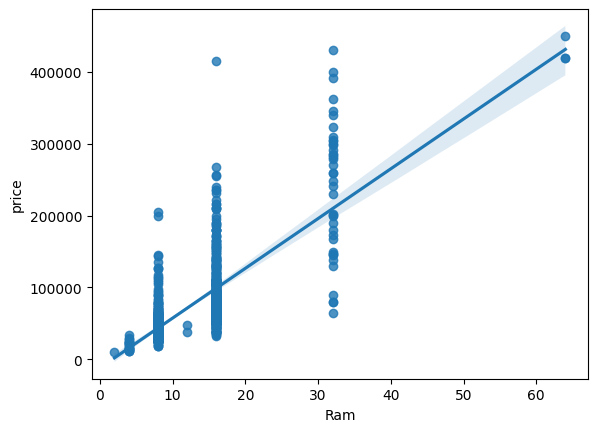

In [ ]:
# plots
sns.regplot(x='Ram', y='price', data=df)

<Axes: xlabel='ROM', ylabel='price'>

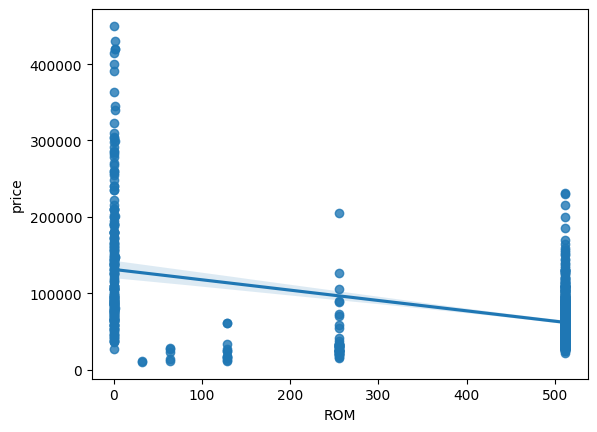

In [ ]:
sns.regplot(x='ROM', y='price', data=df)

<Axes: xlabel='display_size', ylabel='price'>

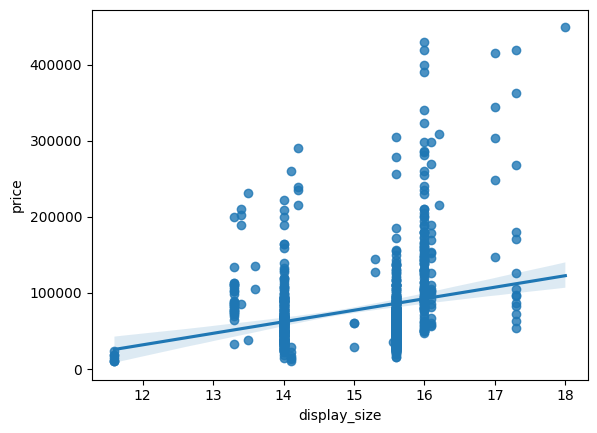

In [ ]:
sns.regplot(x='display_size', y='price', data=df)

<Axes: xlabel='resolution_width', ylabel='price'>

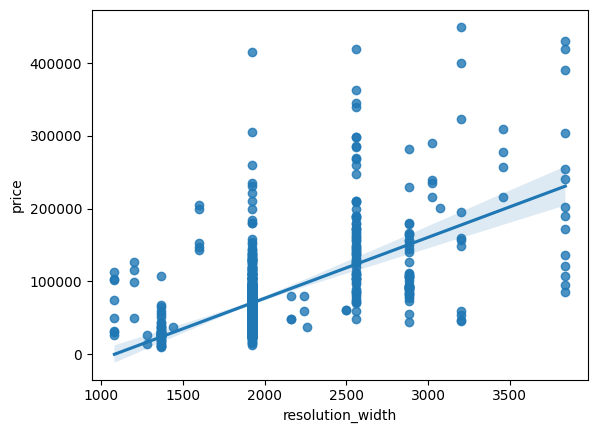

In [ ]:
sns.regplot(x='resolution_width', y='price', data=df)

<Axes: xlabel='resolution_height', ylabel='price'>

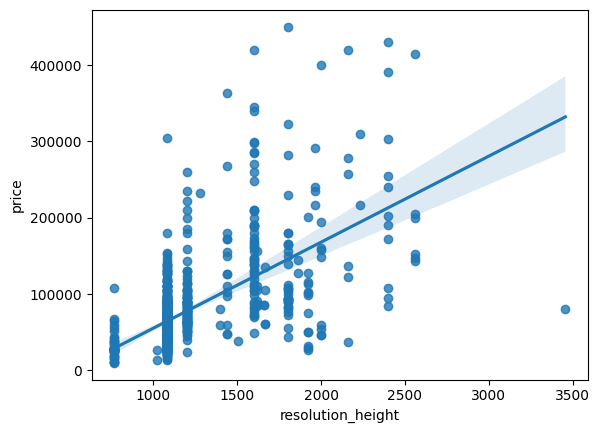

In [ ]:
sns.regplot(x='resolution_height', y='price', data=df)

<Axes: xlabel='spec_rating', ylabel='price'>

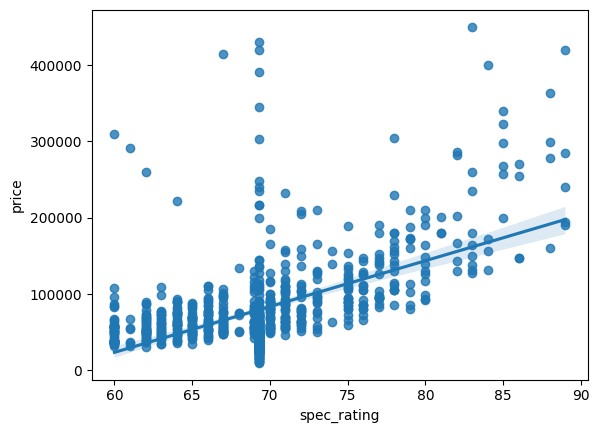

In [ ]:
sns.regplot(x='spec_rating', y='price', data=df)

<Axes: xlabel='warranty', ylabel='price'>

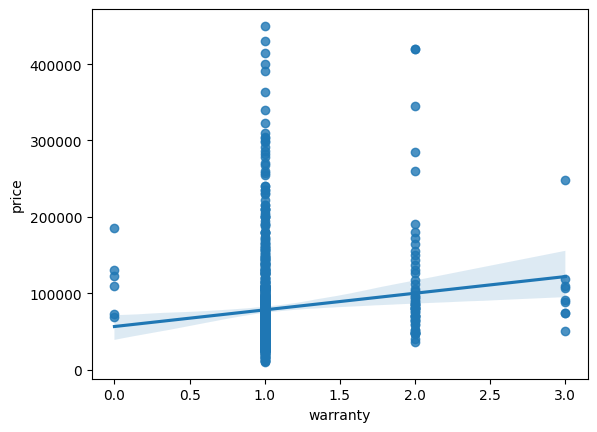

In [ ]:
sns.regplot(x='warranty', y='price', data=df)

<Axes: xlabel='brand', ylabel='price'>

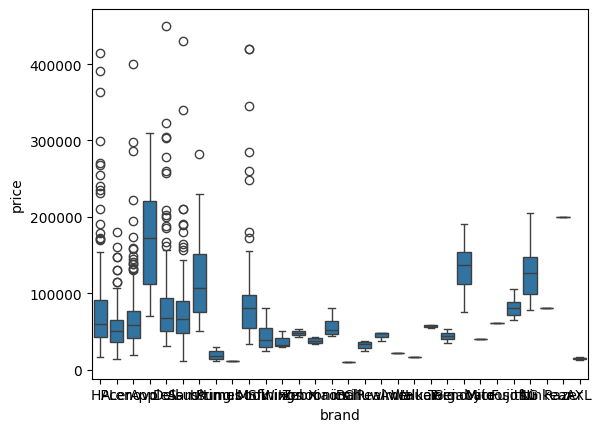

In [ ]:
#boxplots
sns.boxplot(x='brand', y='price', data=df)

<Axes: xlabel='name', ylabel='price'>

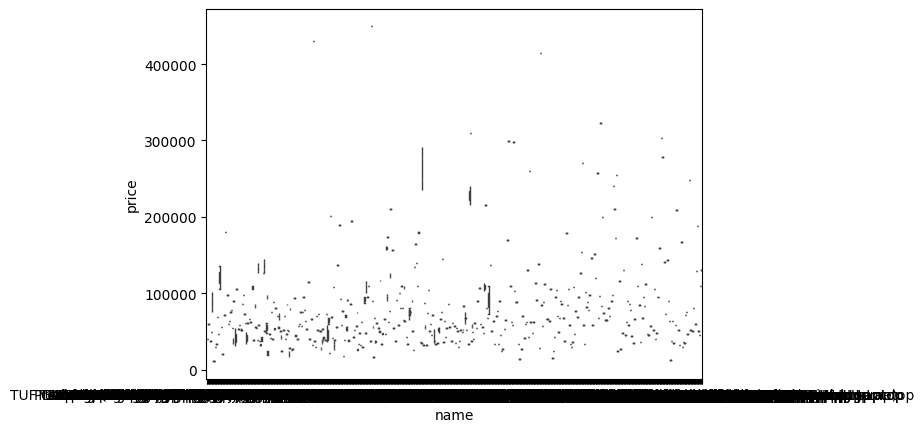

In [ ]:
sns.boxplot(x='name', y='price', data=df)

<Axes: xlabel='processor', ylabel='price'>

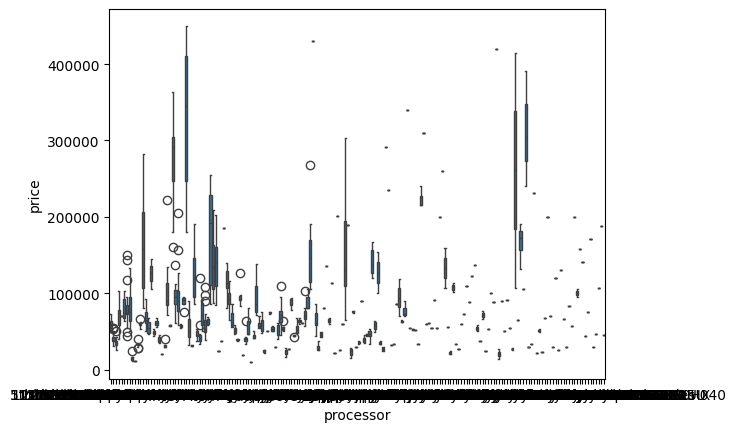

In [ ]:
sns.boxplot(x='processor', y='price', data=df)

<Axes: xlabel='CPU', ylabel='price'>

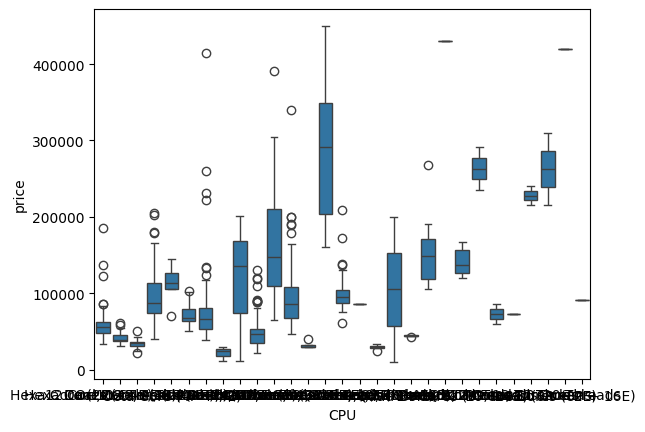

In [ ]:
sns.boxplot(x='CPU', y='price', data=df)

<Axes: xlabel='Ram_type', ylabel='price'>

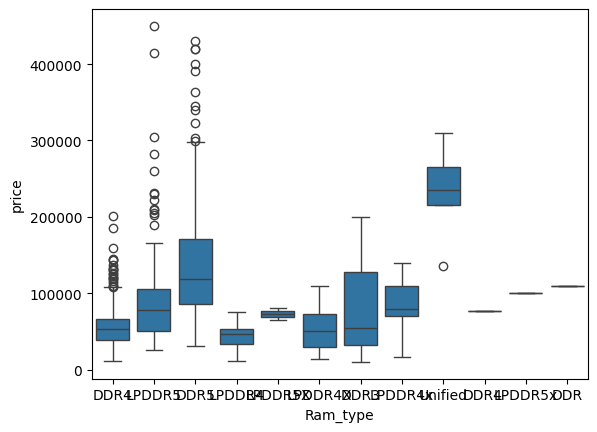

In [ ]:
sns.boxplot(x='Ram_type', y='price', data=df)

<Axes: xlabel='ROM_type', ylabel='price'>

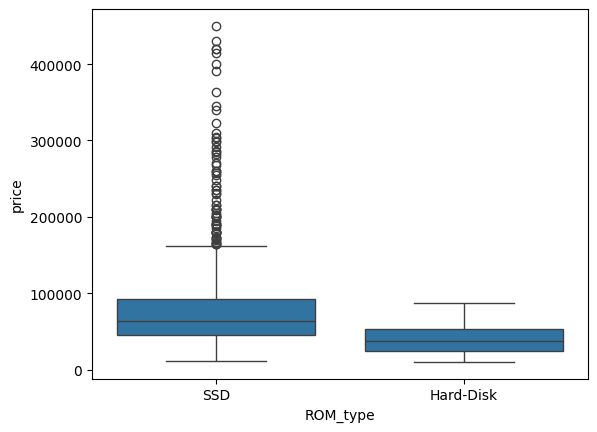

In [ ]:
sns.boxplot(x='ROM_type', y='price', data=df)

<Axes: xlabel='GPU', ylabel='price'>

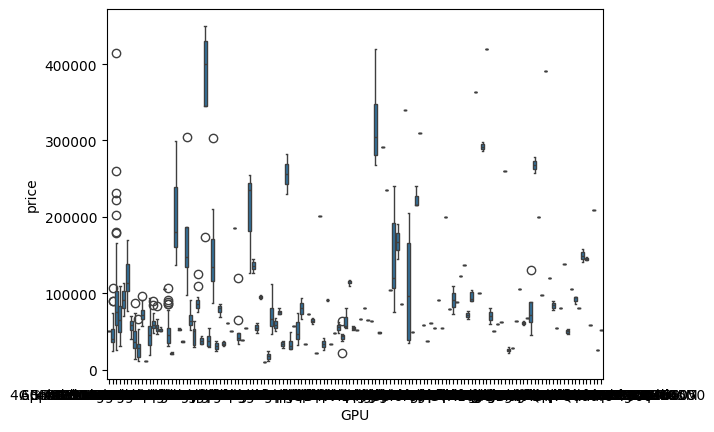

In [ ]:
sns.boxplot(x='GPU', y='price', data=df)

<Axes: xlabel='OS', ylabel='price'>

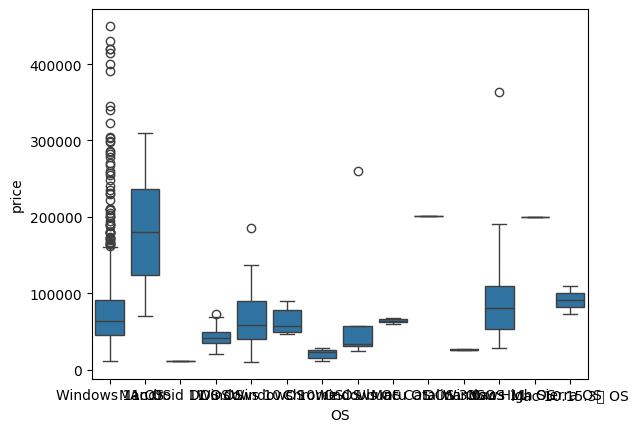

In [ ]:
sns.boxplot(x='OS', y='price', data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              893 non-null    object 
 1   name               893 non-null    object 
 2   price              893 non-null    int64  
 3   spec_rating        893 non-null    float64
 4   processor          893 non-null    object 
 5   CPU                893 non-null    object 
 6   Ram                893 non-null    int64  
 7   Ram_type           893 non-null    object 
 8   ROM                893 non-null    int64  
 9   ROM_type           893 non-null    object 
 10  GPU                893 non-null    object 
 11  display_size       893 non-null    float64
 12  resolution_width   893 non-null    int64  
 13  resolution_height  893 non-null    int64  
 14  OS                 893 non-null    object 
 15  warranty           893 non-null    int64  
dtypes: float64(2), int64(6), o

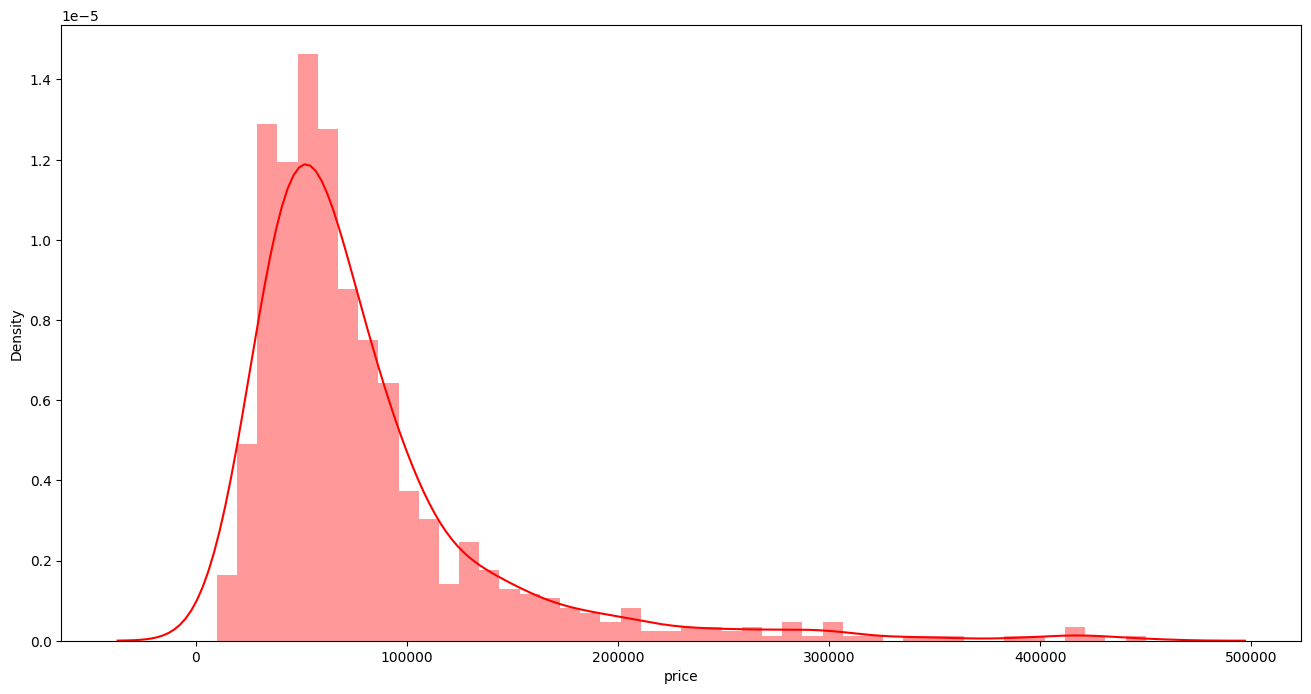

In [ ]:
#Exploratory Data Analysis

#Price Distribution plot
plt.figure(figsize=(16,8))
sns.distplot(df['price'],color='red')
plt.show()

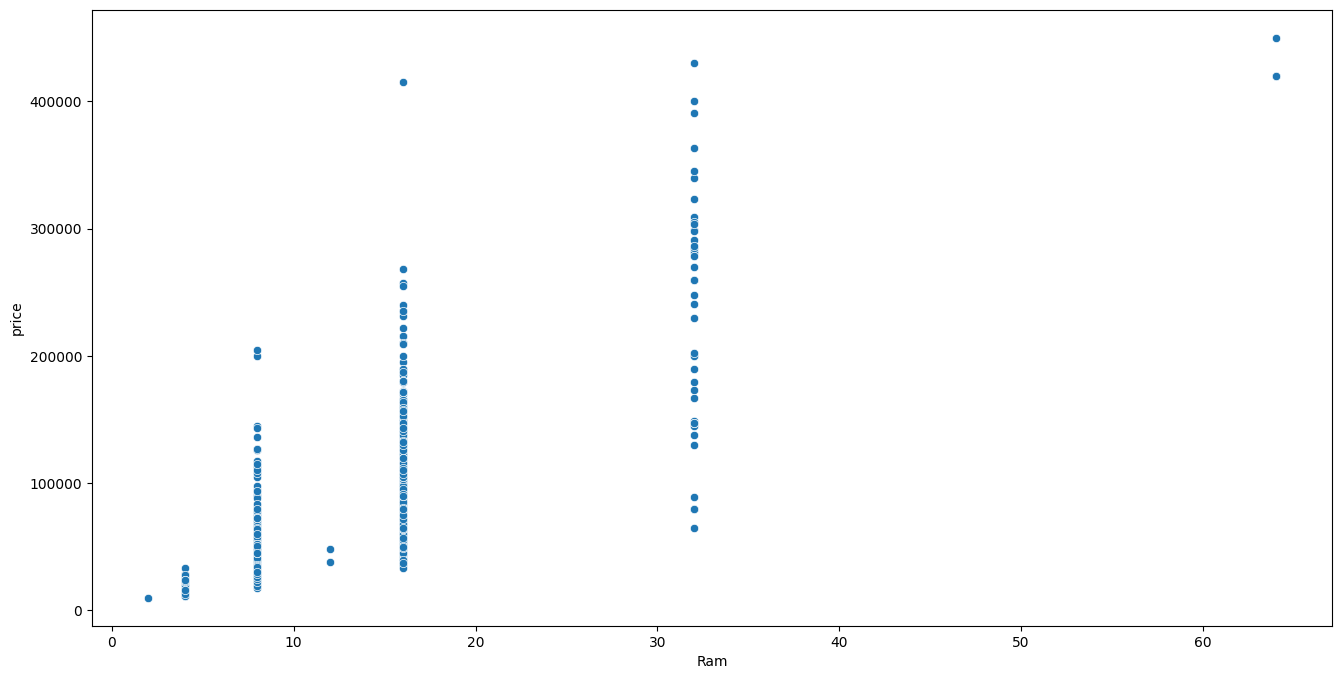

In [ ]:
#Scatterplots
plt.figure(figsize=(16,8))
sns.scatterplot(x = df['Ram'],y = df['price'])
plt.show()

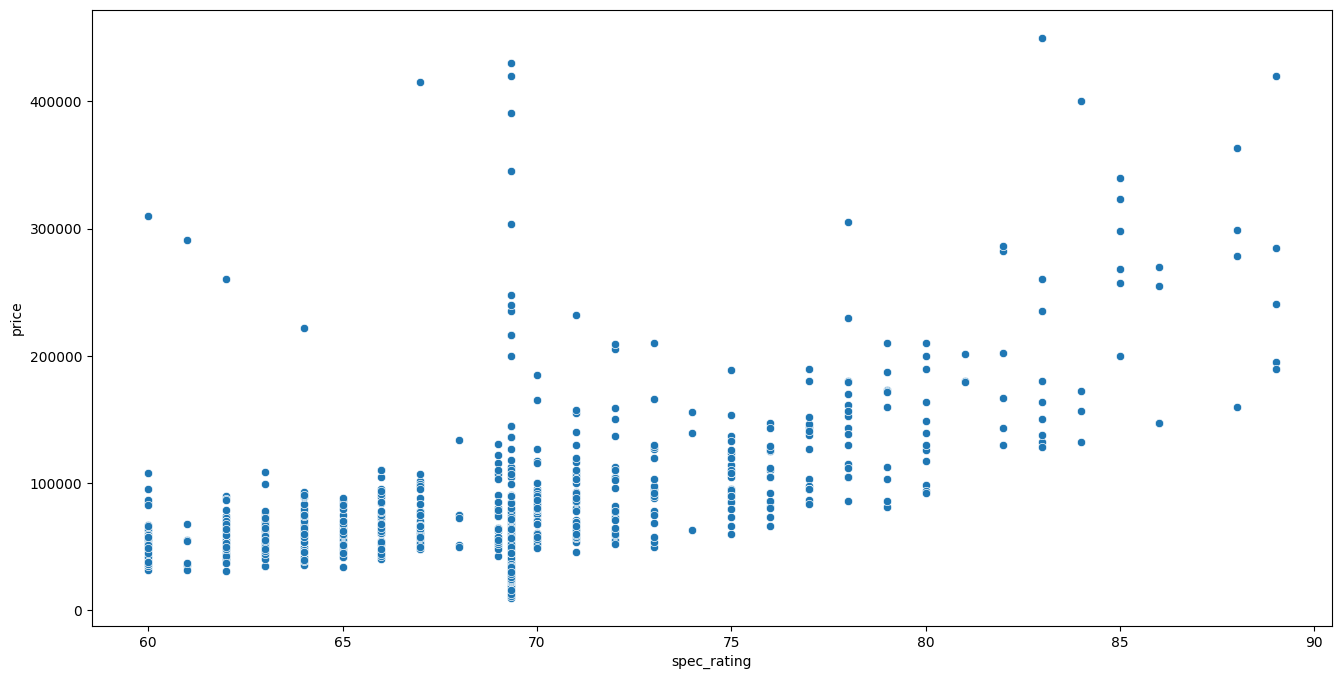

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = df['spec_rating'],y = df['price'])
plt.show()

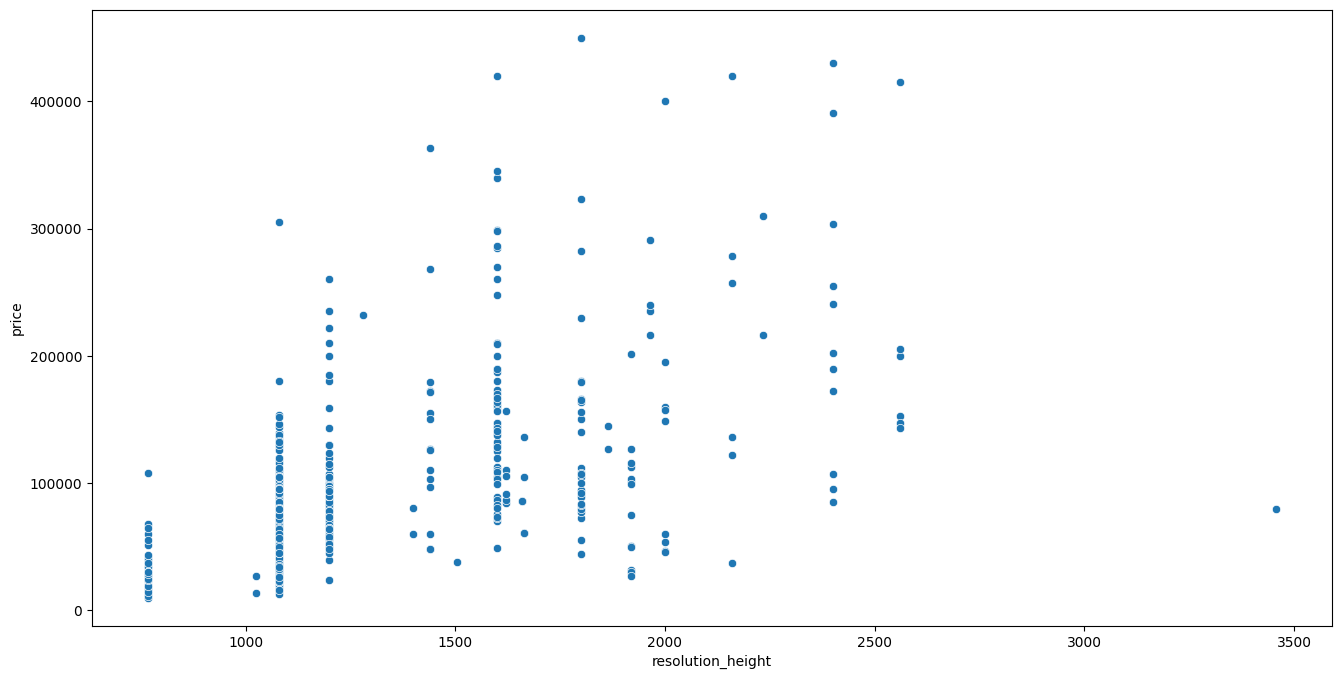

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = df['resolution_height'],y = df['price'])
plt.show()

In [ ]:
#Transformation-converting categorical data into numerical data

labelencoder = LabelEncoder()
df.brand = labelencoder.fit_transform(df.brand)
df.name = labelencoder.fit_transform(df.name)
df.processor = labelencoder.fit_transform(df.processor)
df.CPU = labelencoder.fit_transform(df.CPU)
df.Ram_type = labelencoder.fit_transform(df.Ram_type)
df.ROM_type = labelencoder.fit_transform(df.ROM_type)
df.GPU = labelencoder.fit_transform(df.GPU)
df.OS = labelencoder.fit_transform(df.OS)
print(df)

     brand  name   price  spec_rating  processor  CPU  Ram  Ram_type  ROM  \
0        9   647   49900    73.000000        105   19    8         2  512   
1        9    38   39900    60.000000         34   18    8         2  512   
2        1   440   26990    69.323529         15   17    8         2  512   
3       14   784   59729    66.000000         39    6   16         8  512   
4        2   378   69990    69.323529        160   21    8         2  256   
..     ...   ...     ...          ...        ...  ...  ...       ...  ...   
888      3   697   44990    69.323529         80   18    8         2  512   
889      3   528  110000    71.000000        122   24   16         0    1   
890      3   506  189990    89.000000        143   24   32         4    1   
891      3   534  129990    73.000000         73    8   16         2  512   
892      3   530  131990    84.000000        143   24   16         2    1   

     ROM_type  GPU  display_size  resolution_width  resolution_height  OS  

In [ ]:
#Coefficient of correlations

target_correlations = df.corr()['price'].apply(abs).sort_values()
target_correlations

brand                0.002070
processor            0.064416
OS                   0.066910
name                 0.077481
ROM_type             0.105690
warranty             0.117101
display_size         0.233815
Ram_type             0.267315
CPU                  0.273260
GPU                  0.324344
ROM                  0.481178
spec_rating          0.546391
resolution_width     0.586042
resolution_height    0.604748
Ram                  0.736924
price                1.000000
Name: price, dtype: float64

<Axes: >

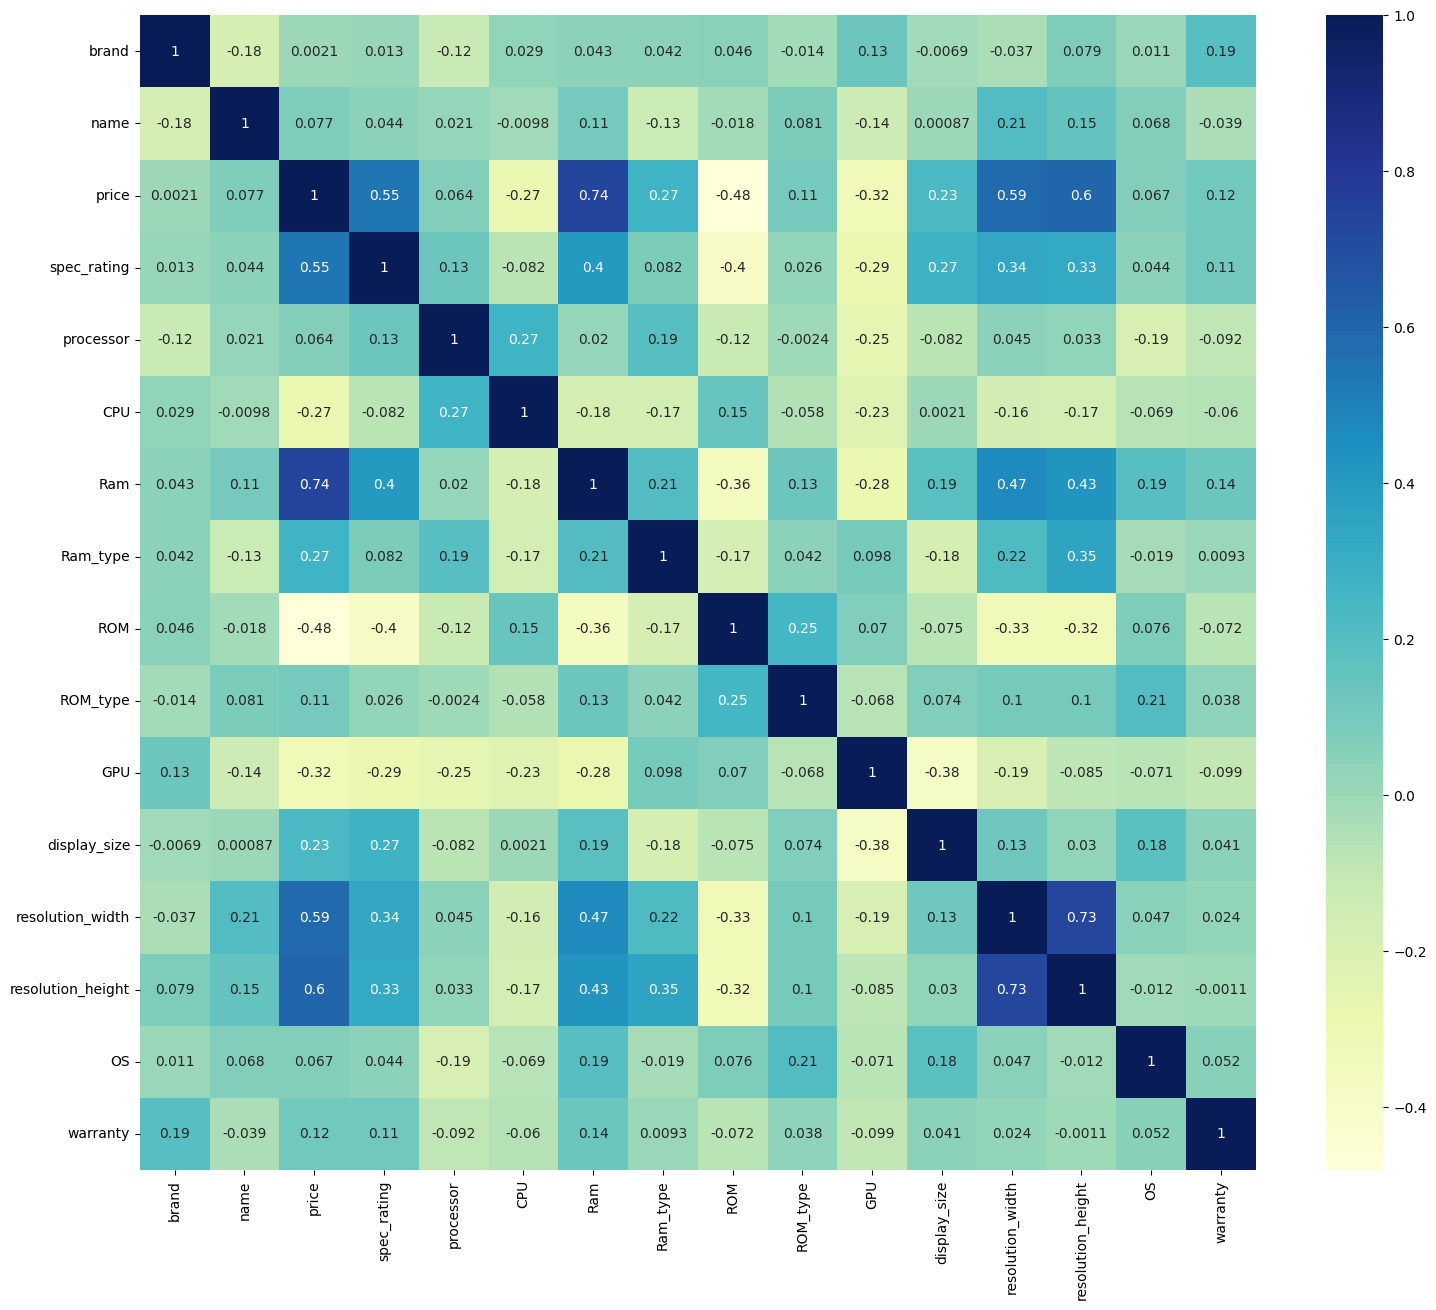

In [ ]:
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [ ]:
#select the features which impact the target veriable(price)
selected_features =target_correlations[-12:].index
selected_features=list(selected_features)
selected_features

['ROM_type',
 'warranty',
 'display_size',
 'Ram_type',
 'CPU',
 'GPU',
 'ROM',
 'spec_rating',
 'resolution_width',
 'resolution_height',
 'Ram',
 'price']

In [ ]:
#check the corr of the selected features
limited_df =df[selected_features]
limited_df

,ROM_type,warranty,display_size,Ram_type,CPU,GPU,ROM,spec_rating,resolution_width,resolution_height,Ram,price
0,1,1,15.6,2,19,19,512,73.000000,1920,1080,8,49900
1,1,1,15.6,2,18,126,512,60.000000,1920,1080,8,39900
2,1,1,14.0,2,17,123,512,69.323529,1920,1080,8,26990
3,1,1,14.0,8,6,111,512,66.000000,2240,1400,16,59729
4,1,1,13.3,2,21,91,256,69.323529,2560,1600,8,69990
...,...,...,...,...,...,...,...,...,...,...,...,...
888,1,1,15.6,2,18,95,512,69.323529,1920,1080,8,44990
889,1,1,15.6,0,24,52,1,71.000000,2560,1440,16,110000
890,1,1,14.0,4,24,63,1,89.000000,2560,1600,32,189990
891,1,1,15.6,2,8,53,512,73.000000,1920,1080,16,129990


<Axes: >

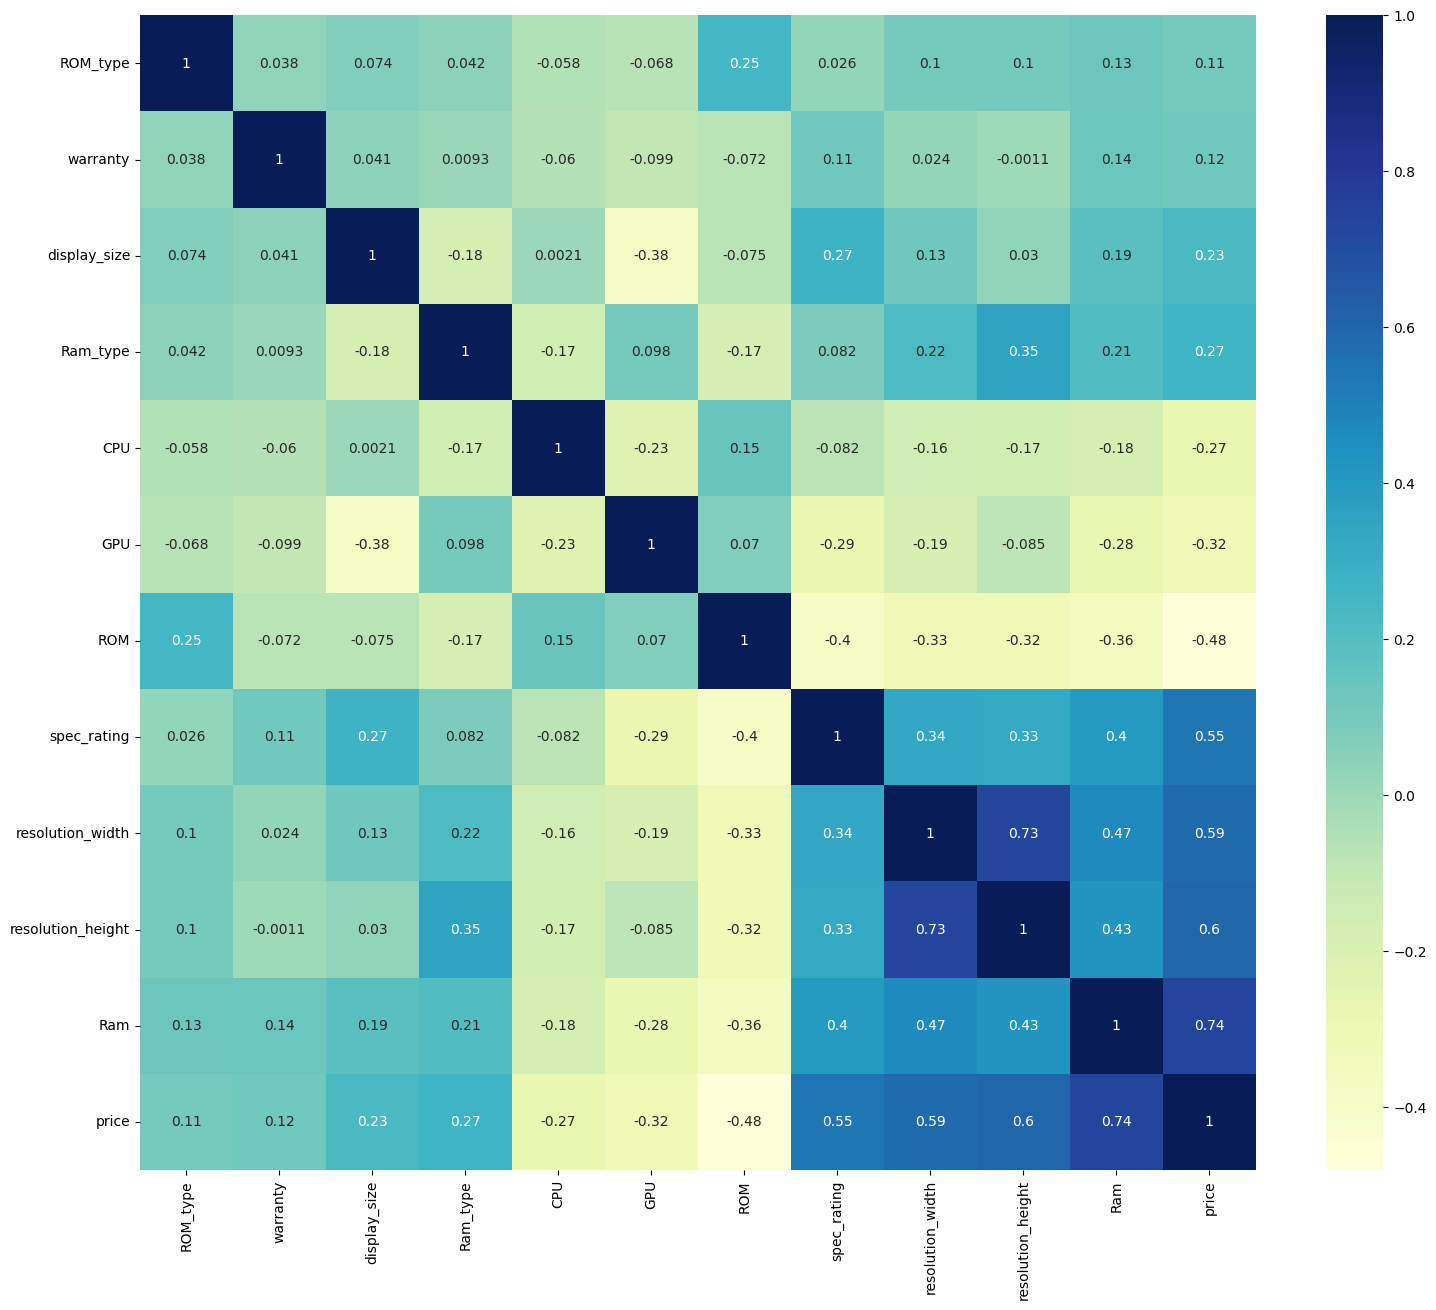

In [ ]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap='YlGnBu')

In [ ]:
# The more blue areas founded, the more correlated to the price

In [ ]:
#Scaling(normalization)
X, y =limited_df.drop('price', axis=1), limited_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Fit and Evaluate Model

#Multiple_linear_Regression(MLR)
model = LinearRegression()
model_mlr = model.fit(X_train,y_train)
#Predict price using test
y_pred_MLR = model_mlr.predict(X_test)

In [ ]:
#Calculating the Mean Square Error for MLR
mse_MLR = mean_squared_error(y_test,y_pred_MLR)
print('The mean square error for Multiple Linear Regression: ', mse_MLR)

The mean square error for Multiple Linear Regression:  901462242.6786623


In [ ]:
#Calculating the Mean Absolute Error for MLR
mae_MLR= mean_absolute_error(y_test, y_pred_MLR)
print('The mean absolute error for Multiple Linear Regression: ', mae_MLR)

The mean absolute error for Multiple Linear Regression:  21050.776000339818


In [ ]:
#Random Forest Regressor
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)
forest.score(X_test_scaled, y_test)

0.7173872578924816

In [ ]:
#prediction of laptop price using testing
y_pred_RF = forest.predict(X_test_scaled)

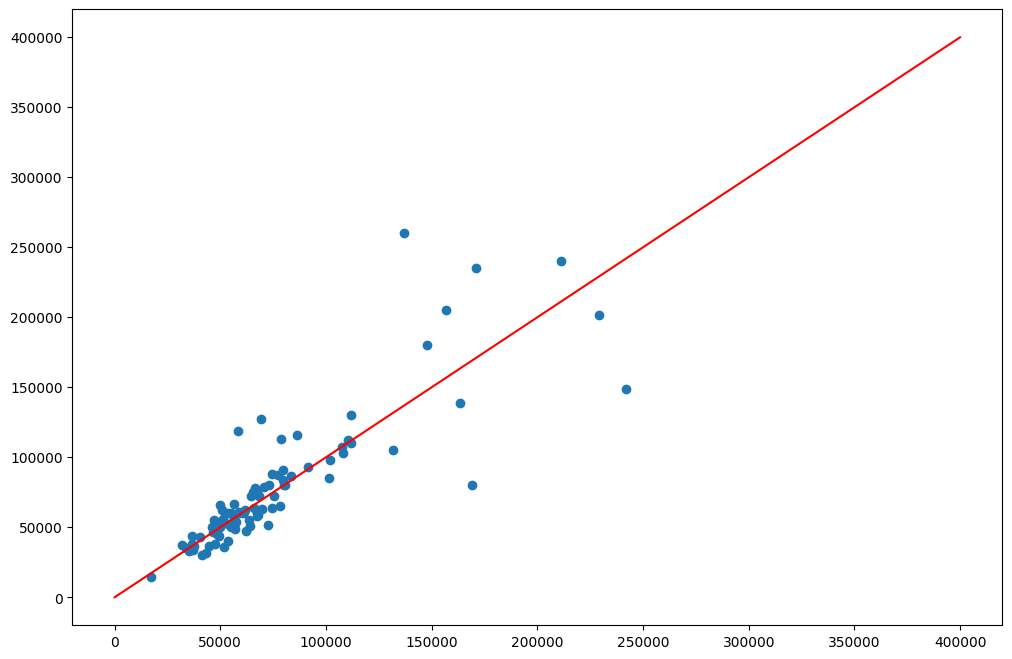

In [ ]:
#line and scatter plot
plt.figure(figsize=(12,8))
plt.scatter(y_pred_RF, y_test)
plt.plot(range(0, 400000), range(0, 400000), c='red')

In [ ]:
#Random Forest Evaluation
#Calculating the Mean Square Error for Random Forest Model
mse_RF = mean_squared_error(y_test, y_pred_RF)
print('The mean square error of price and predicted value is: ', mse_RF)

The mean square error of price and predicted value is:  623885963.1951094


In [ ]:
#Calculating the absolute Square Error for Random Forest Model
mae_RF= mean_absolute_error(y_test, y_pred_RF)
print('The mean absolute error of price and predicted value is: ', mae_RF)

The mean absolute error of price and predicted value is:  13535.798357243062


In [ ]:
#LASSO Model
LassoModel = Lasso()
model_lm = LassoModel.fit(X_train,y_train)

y_pred_lasso = model_lm.predict(X_test)


In [ ]:
#LASSO Evaluation
#Mean Absolute Error for LASSO Model
mae_lasso= mean_absolute_error(y_test,y_pred_lasso)
print('The mean absolute error of price and predicted value is: ', mae_lasso)

The mean absolute error of price and predicted value is:  21051.212753513253


In [ ]:
#Mean squared Error for LASSO Model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print('The mean square error of price and predicted value is: ', mse_lasso)

The mean square error of price and predicted value is:  901494597.1042942


In [ ]:
scores = [('MLR', mae_MLR),
          ('Random Forest', mae_RF),
          ('LASSO', mae_lasso)
         ]


In [ ]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,21050.776000
1,Random Forest,13535.798357
2,LASSO,21051.212754


In [ ]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

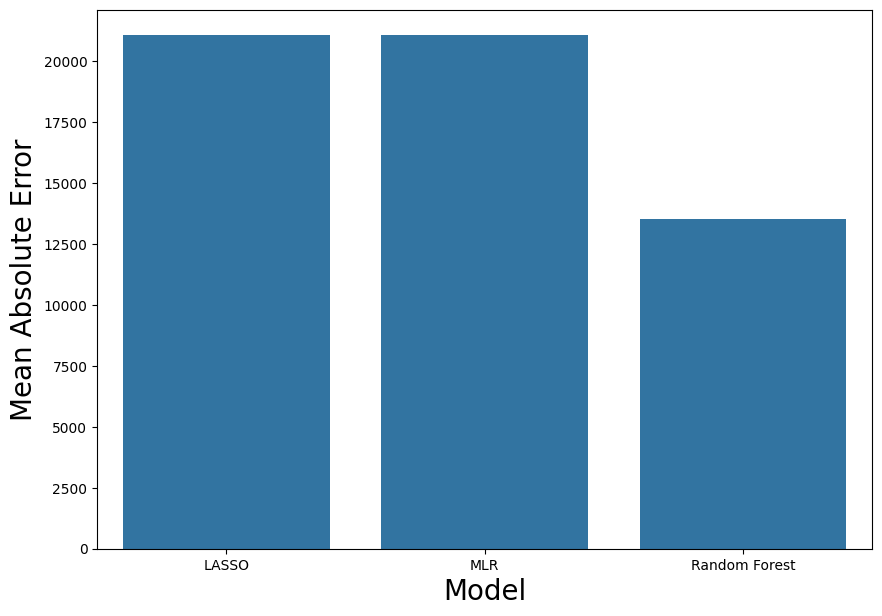

In [ ]:
f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()

In [ ]:
#TESTING
X_test.iloc[0]

ROM_type                1.0
warranty                1.0
display_size           15.6
Ram_type                4.0
CPU                    19.0
GPU                    33.0
ROM                   512.0
spec_rating            71.0
resolution_width     1920.0
resolution_height    1080.0
Ram                     8.0
Name: 353, dtype: float64

In [ ]:
#predict
X_new_scaled = scaler.transform([X_test.iloc[0]])
forest.predict(X_new_scaled)

array([66505.39333333])

In [ ]:
#test
y_test.iloc[0]

78400